In [9]:
from __future__ import annotations
from typing import List, Tuple, Sequence, Dict, Any, Union

from voronoi_site_suite import load_sites_cases, generate_sites
from viz_suite import render_sites,render_power_diagrams
from complexity_power import analyze_power_cells_complexity

# 1. Power Diagram Algorithm

In [10]:
Point = Tuple[float, float]
WPoint = Tuple[int, int, int]            # (x, y, w)
HalfPlane = Tuple[float, float, float]   # ax + by <= c

def build_power_cells(
    sites_in: Sequence[WPoint],
    stats: bool = False
) -> Union[List[List[HalfPlane]], Dict[str, Any]]:
    """
    Build per-site half-planes for a Power Diagram.
    Inputs: sites_in as validated integer (x,y,w).
    Output:
      - stats=False: list of per-site [(a,b,c)] with ax+by<=c
      - stats=True:  dict with operation counts and Θ(n^2) summary
    """
    n = len(sites_in)
    if n < 2:
        raise ValueError("need at least 2 sites")

    if stats:
        add = sub = mul = assign = tuple_create = 0
        assign += 1  # placeholder for power_regions
        for i in range(n):
            assign += 1
            xi, yi, wi = sites_in[i]
            for j in range(n):
                if j == i:
                    continue
                assign += 1
                xj, yj, wj = sites_in[j]

                sub += 1      # (xj - xi)
                mul += 1      # 2.0 * (...)
                assign += 1   # a =

                sub += 1      # (yj - yi)
                mul += 1
                assign += 1   # b =

                mul += 2      # xj*xj, yj*yj
                add += 1
                mul += 2      # xi*xi, yi*yi
                add += 1
                sub += 1      # (...) - (...)
                sub += 1      # (wi - wj)
                add += 1
                assign += 1   # c =

                tuple_create += 1
                assign += 1   # append

        return {
            "n": n,
            "pairs": n * (n - 1),
            "halfplanes_stored": n * (n - 1),
            "ops": {
                "add": add,
                "sub": sub,
                "mul": mul,
                "assign": assign,
                "tuple_create": tuple_create,
            },
            "asymptotic": {"time": "Theta(n^2)", "space": "Theta(n^2)"},
        }

    power_regions: List[List[HalfPlane]] = []
    for i in range(n):
        xi, yi, wi = sites_in[i]
        hi: List[HalfPlane] = []
        for j in range(n):
            if j == i:
                continue
            xj, yj, wj = sites_in[j]
            a = 2.0 * (xj - xi)
            b = 2.0 * (yj - yi)
            c = (xj * xj + yj * yj) - (xi * xi + yi * yi) + (wi - wj)
            hi.append((a, b, c))
        power_regions.append(hi)
    return power_regions

# 2.Test cases with three different point configurations

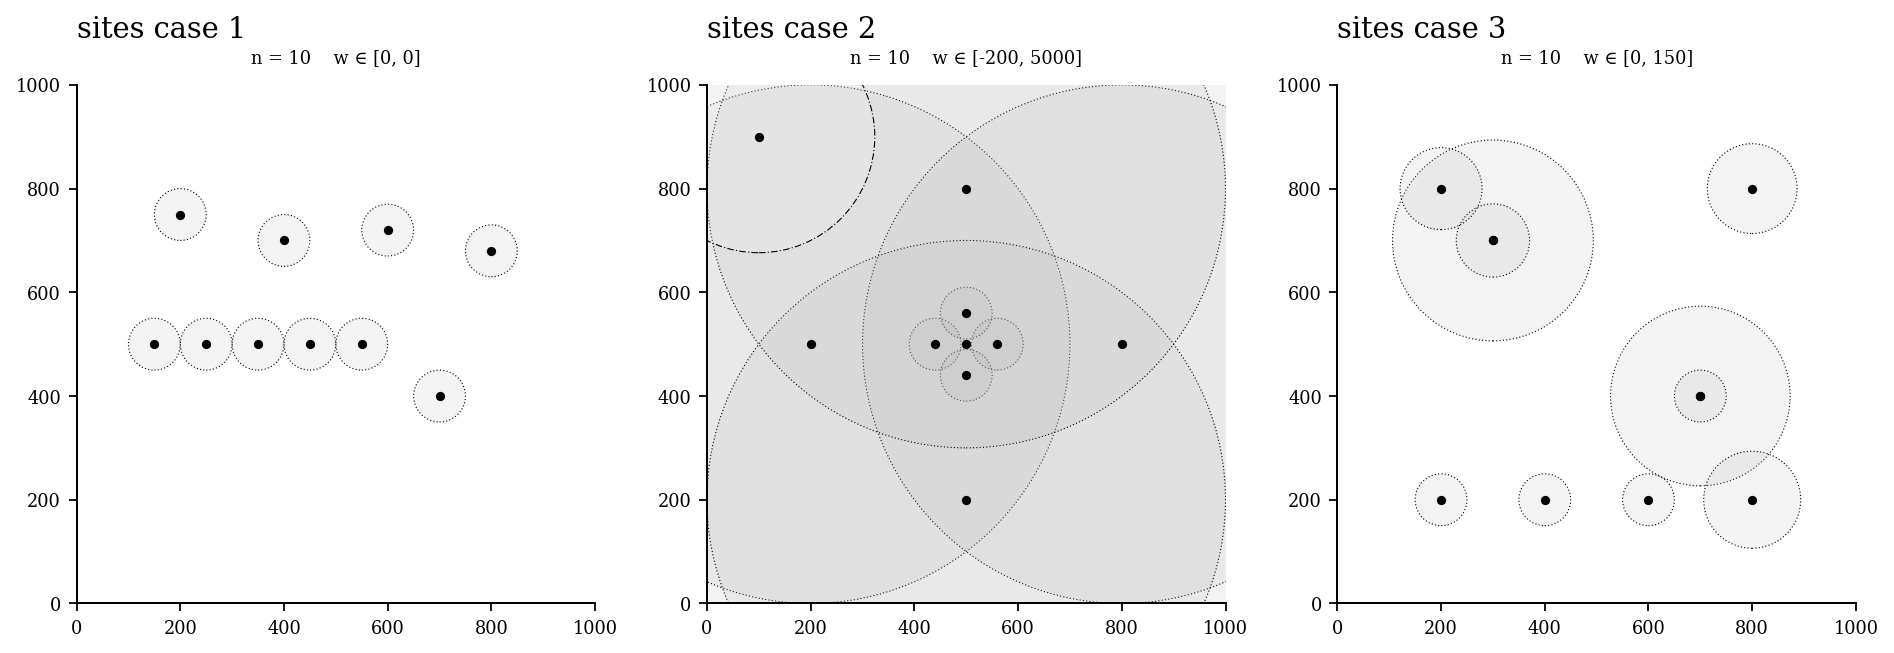

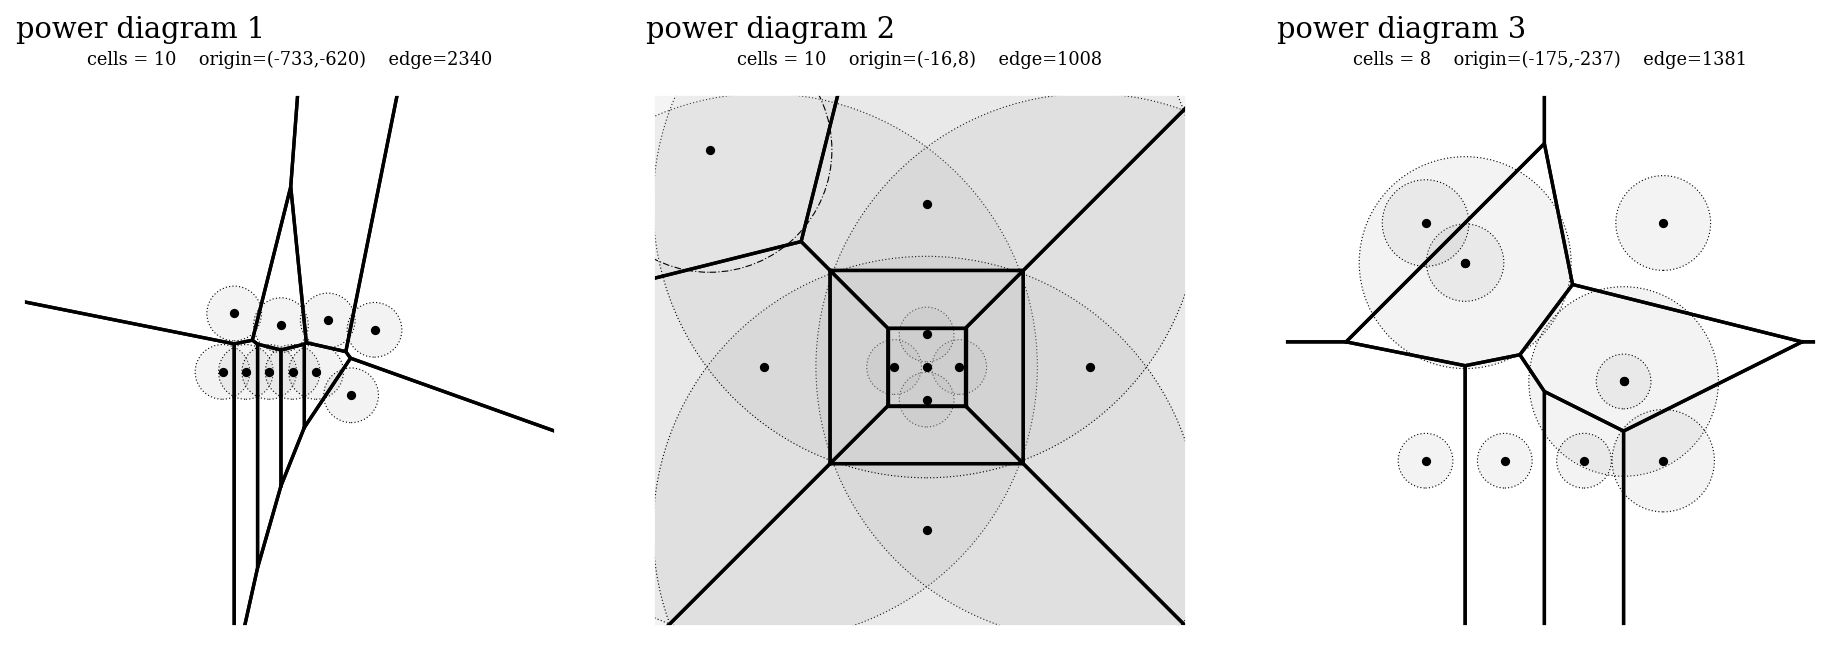

In [12]:
Sites = load_sites_cases()   
render_sites(Sites, coord_range=1000, cols_per_row=3)

PRs = [build_power_cells(S) for S in Sites]
render_power_diagrams(Sites, PRs, cols_per_row=3, max_expand=3.0)

# 3.Time and space complexity

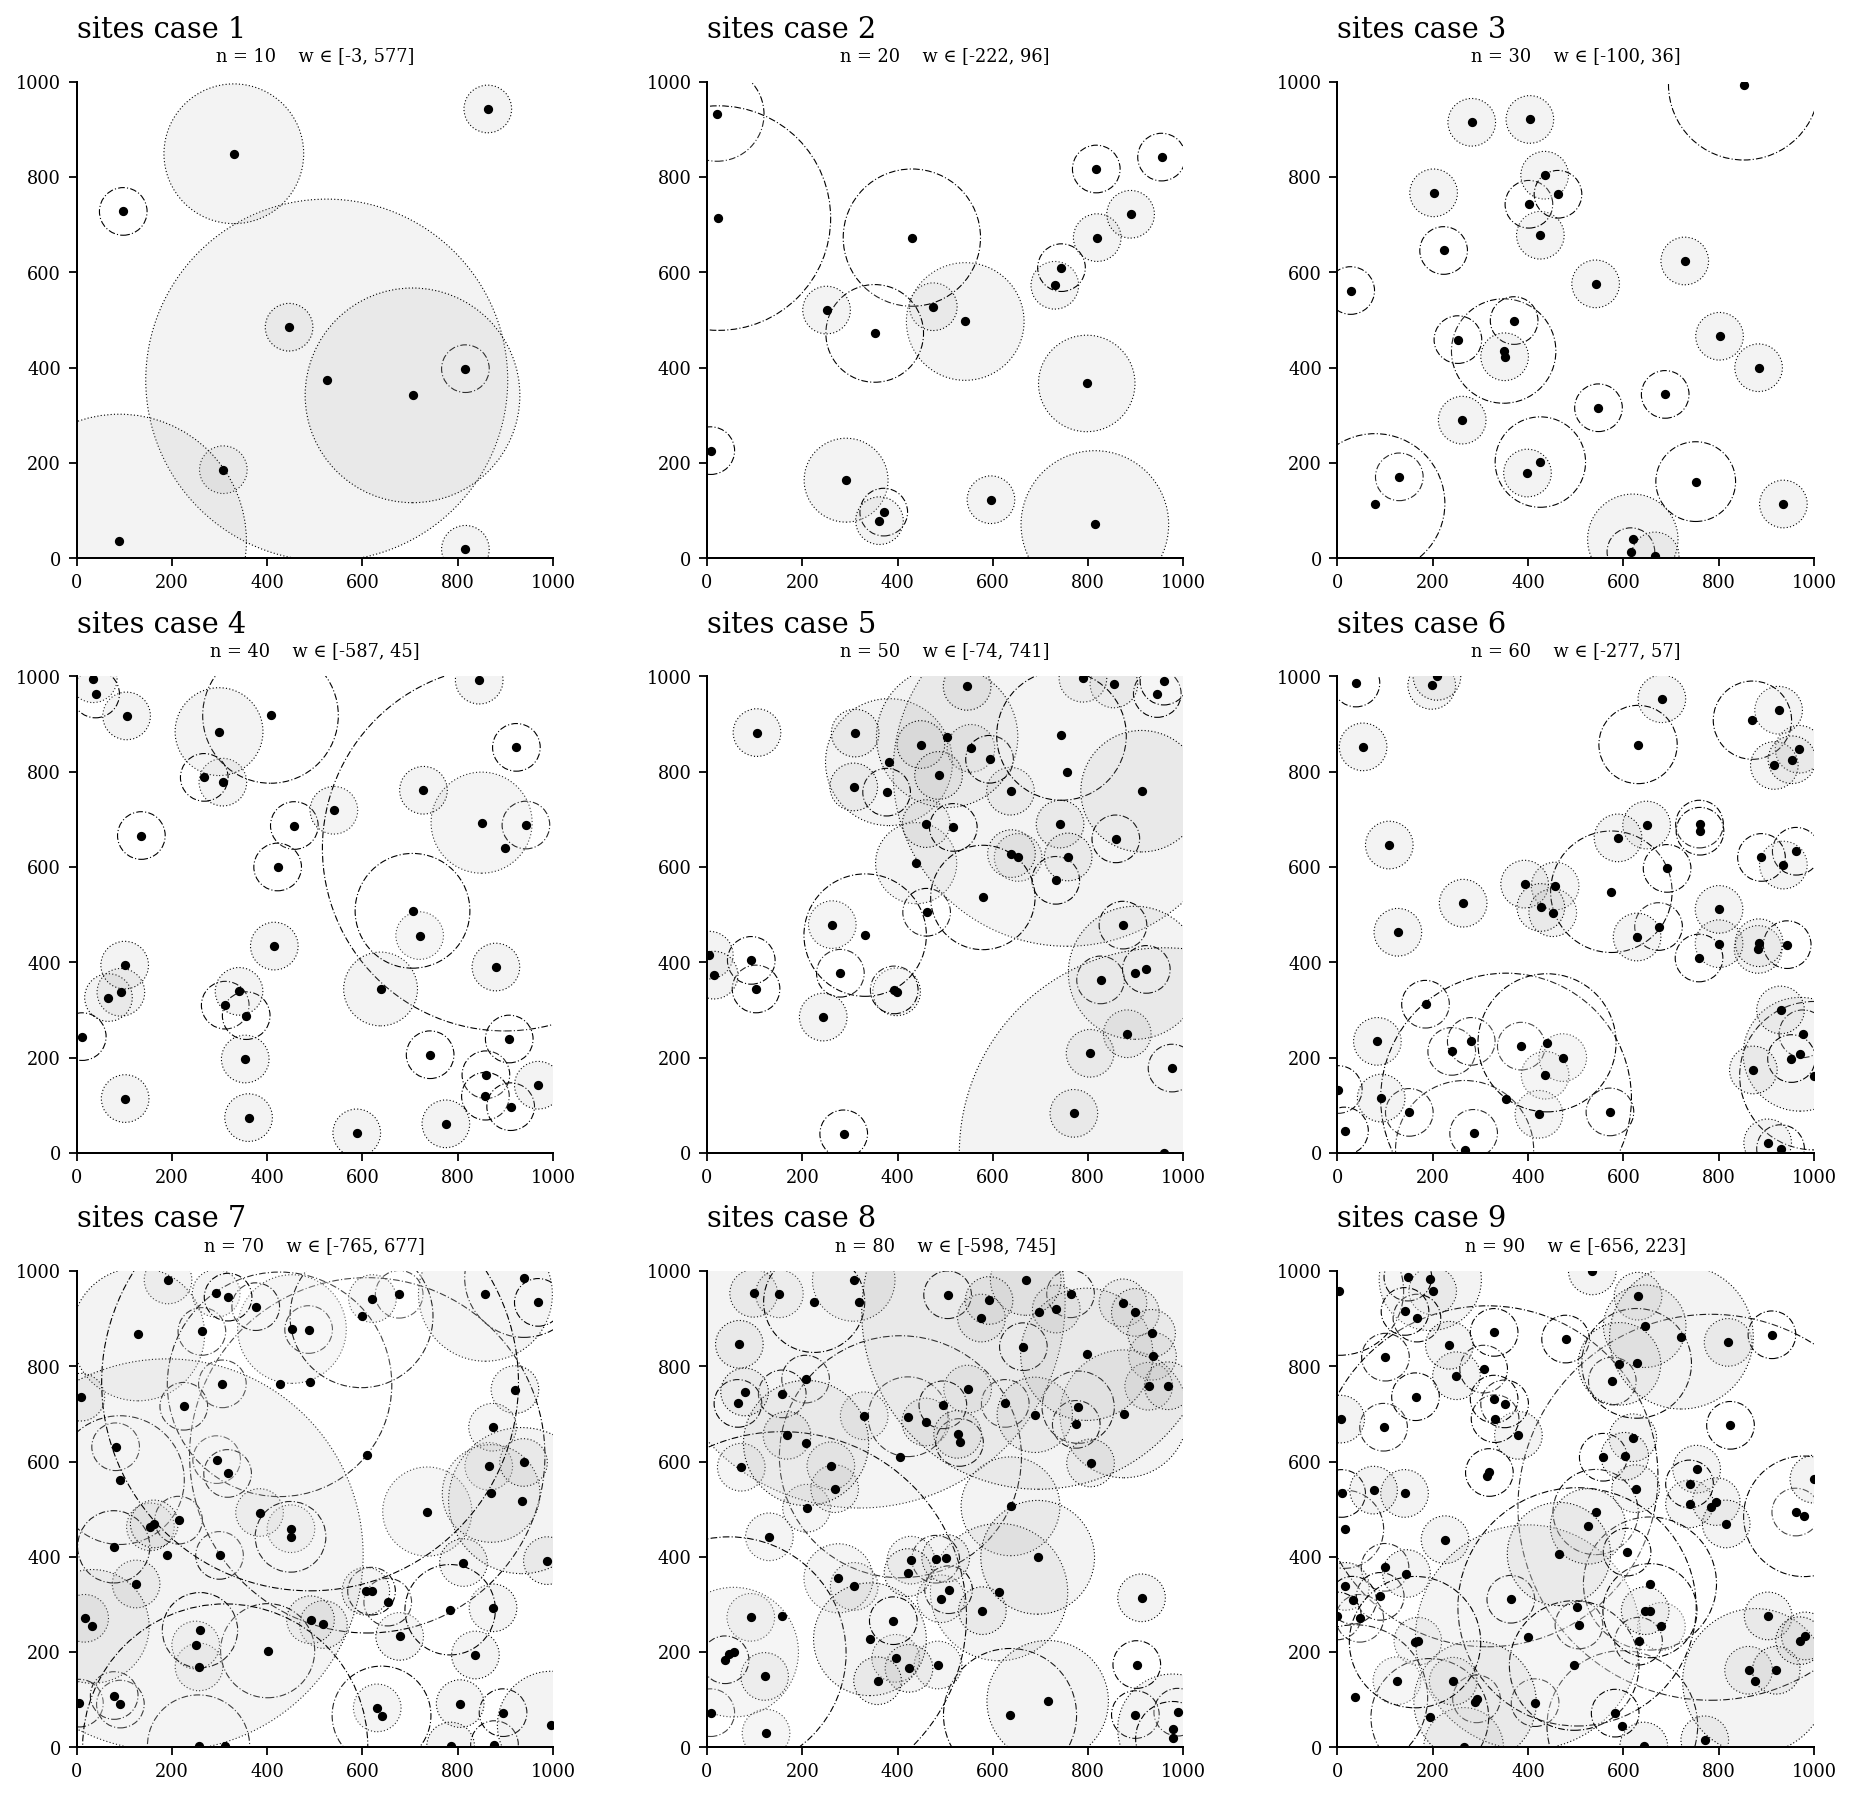

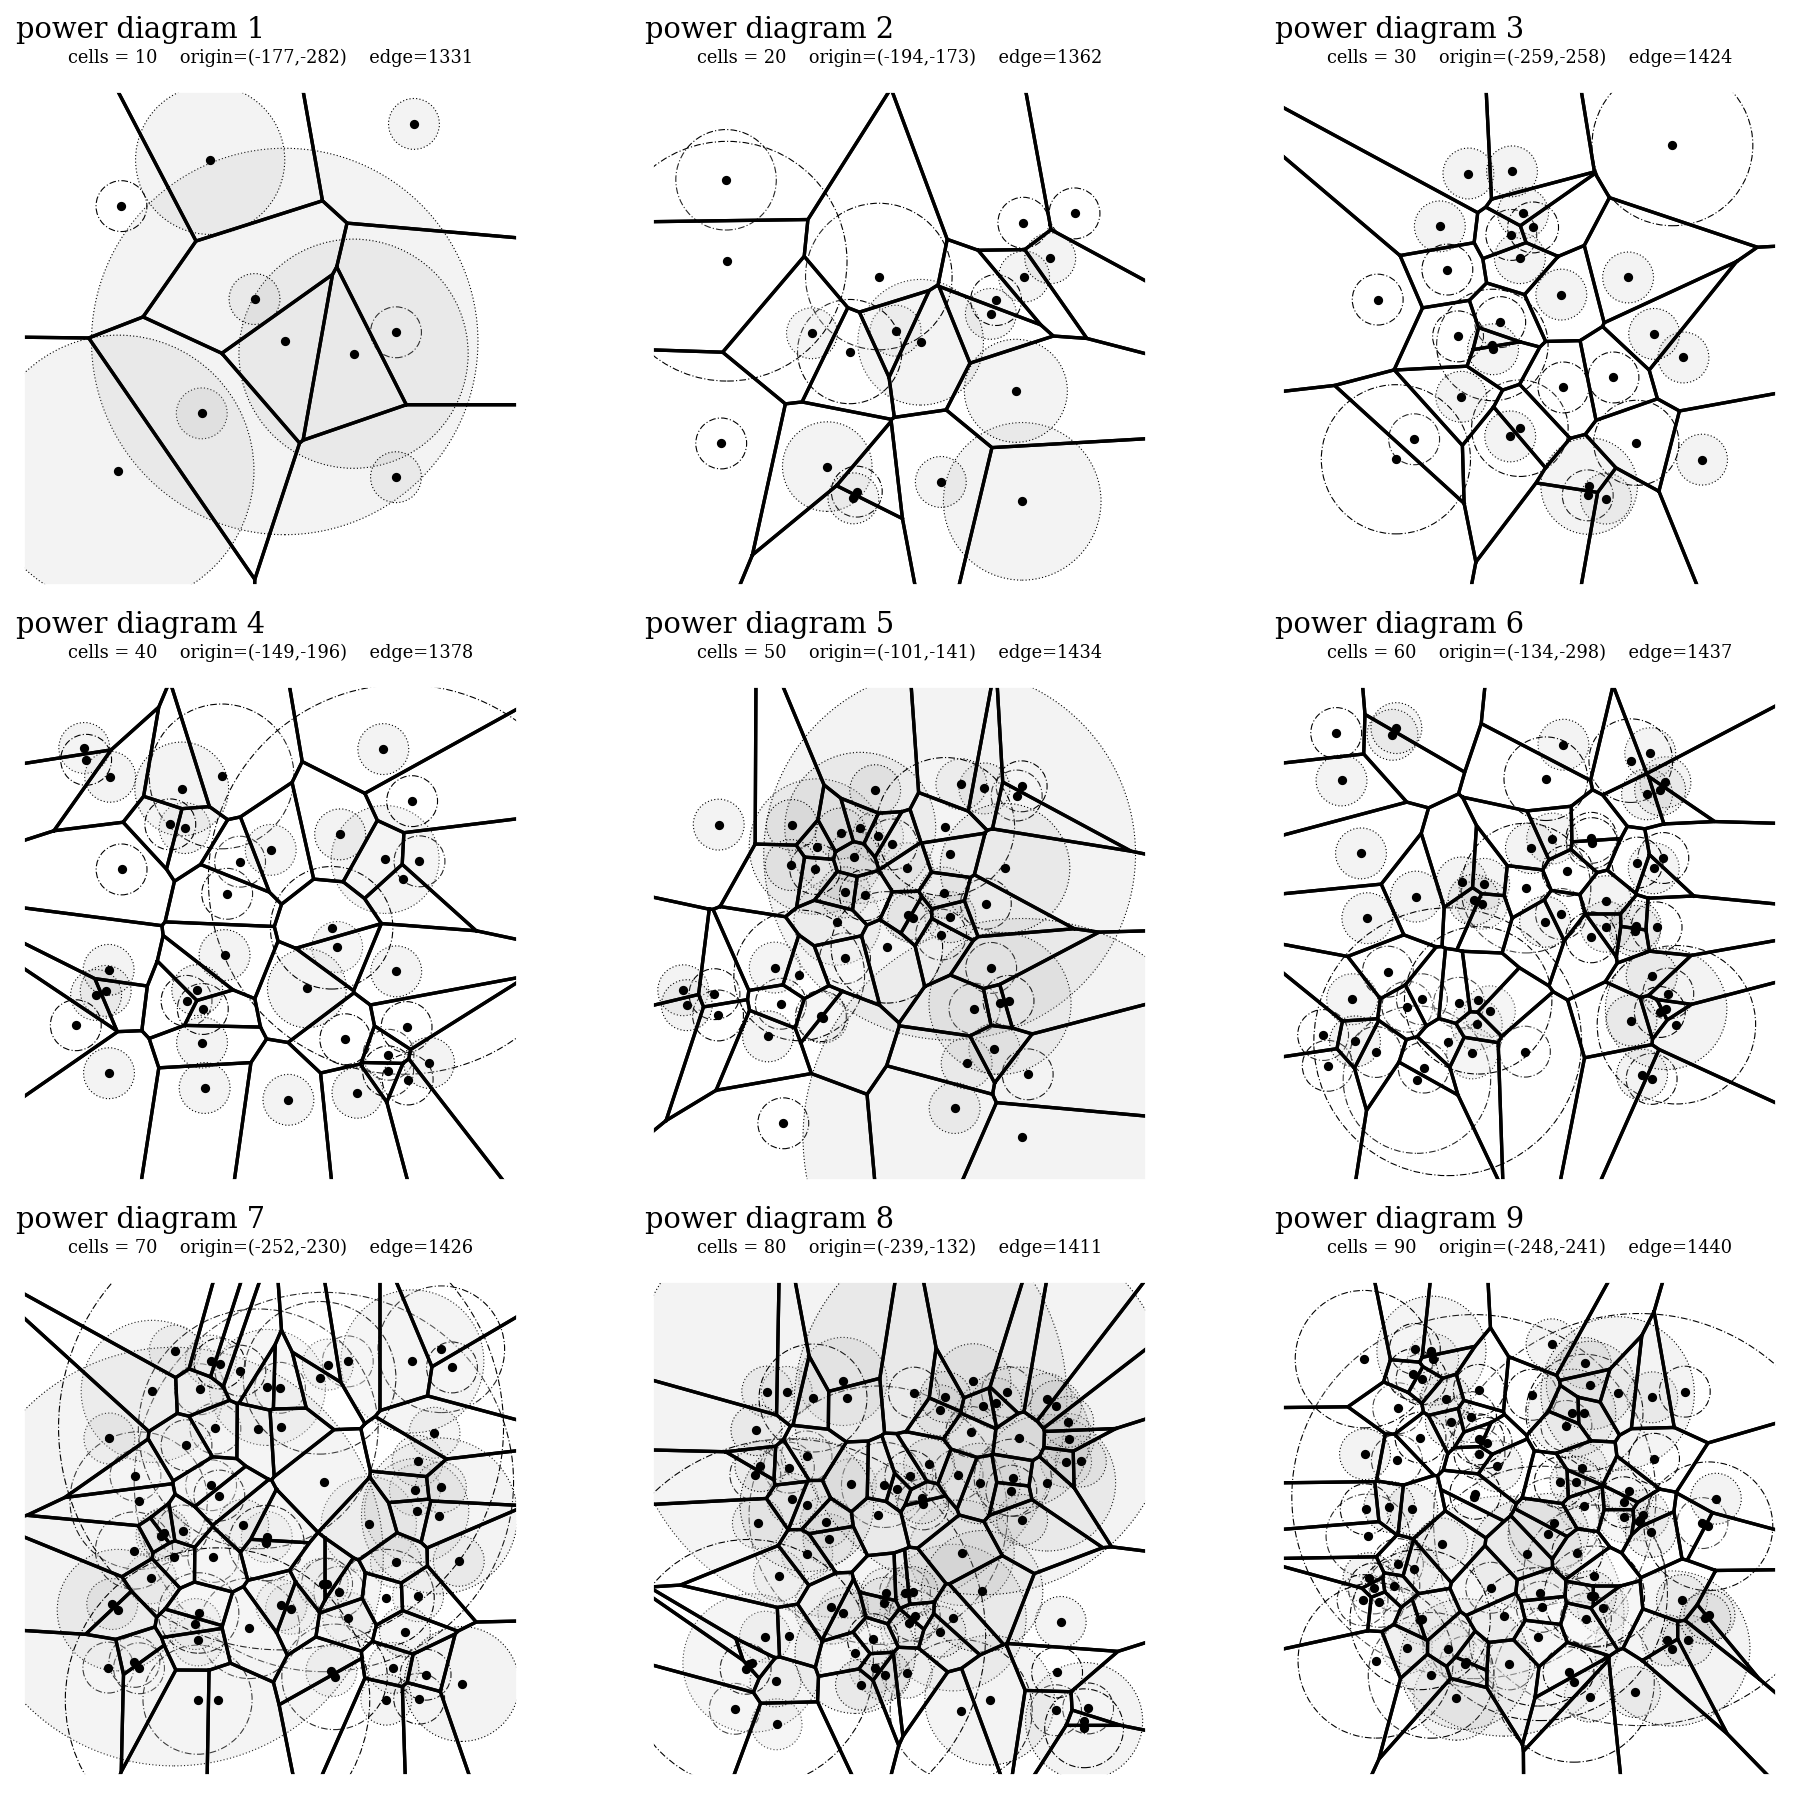

In [15]:
TestSites = generate_sites([10,20,30,40,50,60,70,80,90], 
                           image_size=1000,seed=1024)
render_sites(TestSites, coord_range=1000, cols_per_row=3)

TestPRs = [build_power_cells(TS) for TS in TestSites]
render_power_diagrams(TestSites, TestPRs, cols_per_row=3, max_expand=1.2)

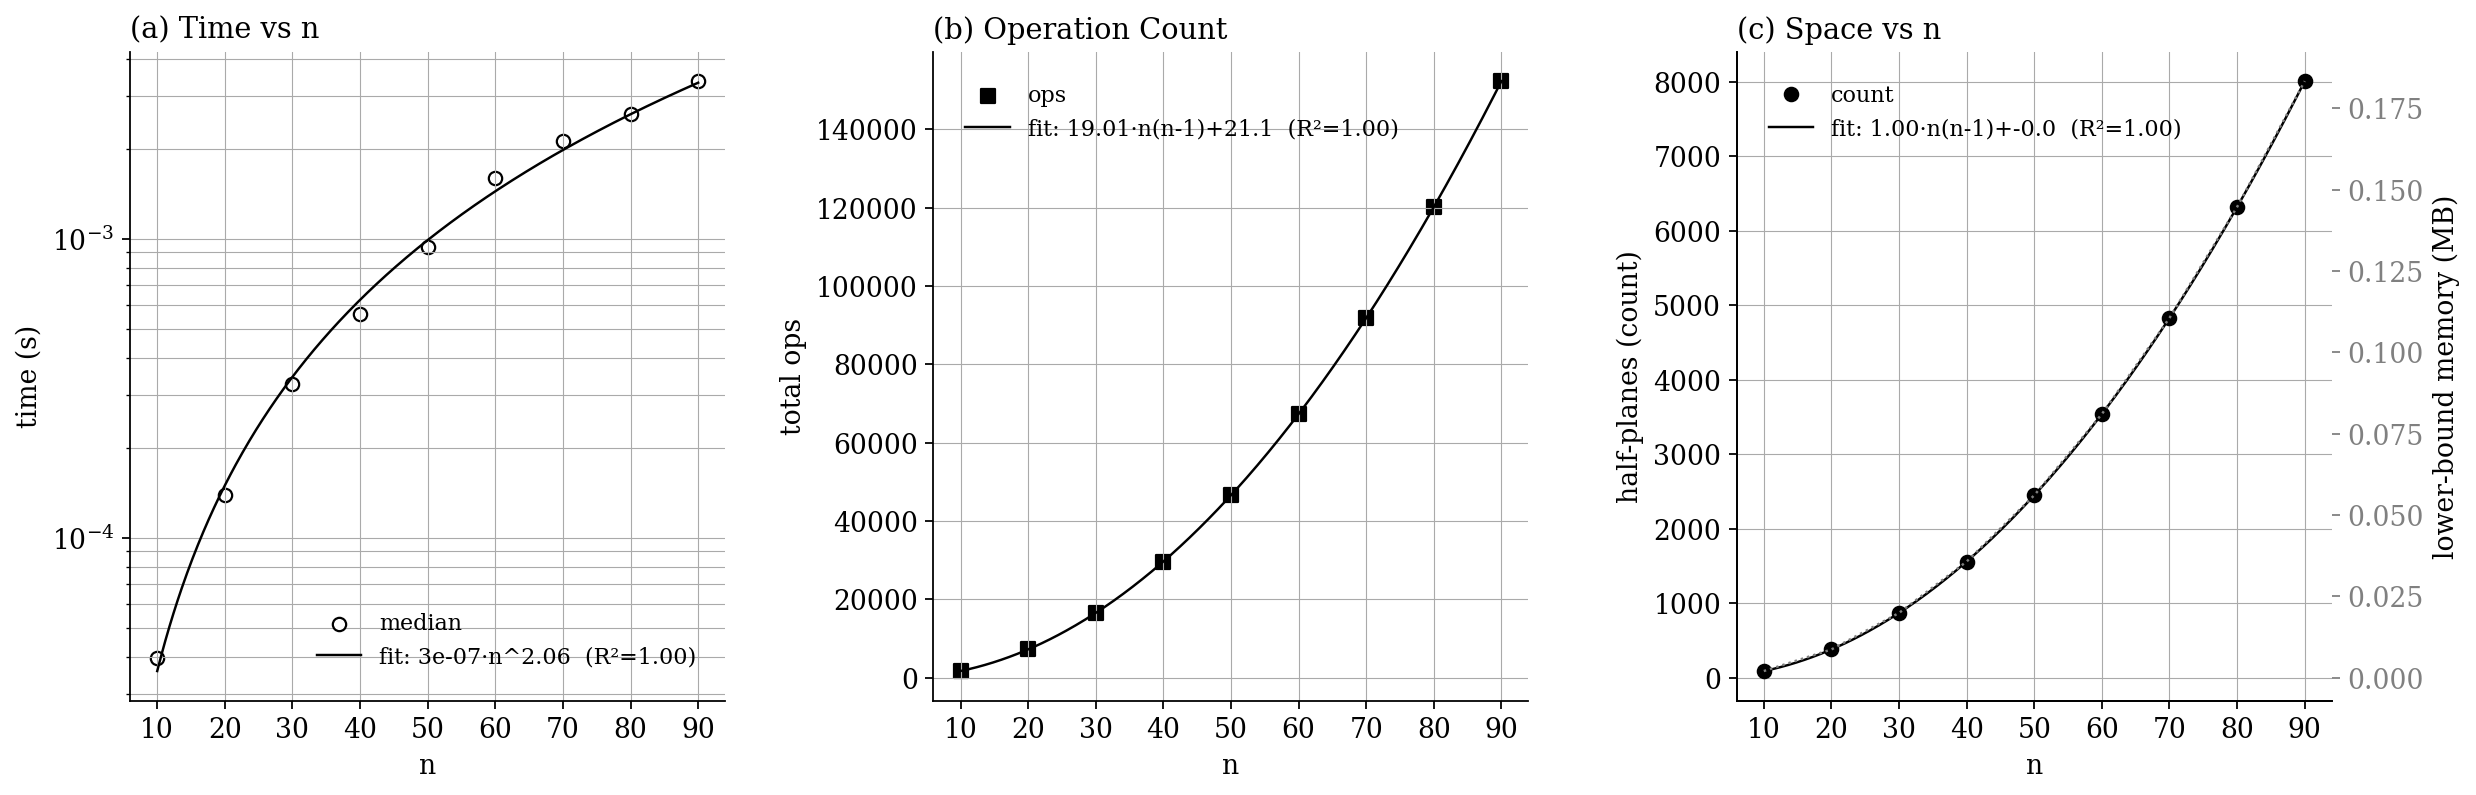

In [18]:
rep = analyze_power_cells_complexity(TestSites, build_power_cells, runs=5, show=True)